# YouTube Trending Video Analyzer + Channel Insights Toolkit (GB)


**Course:** AIL 202 — Programming for AI  
**Project:** Complex Computing Problem  
**Dataset:** `GBvideos.csv` (YouTube Trending Videos — United Kingdom)

**Group Members:**  
- Fatima Irfan (01-136242-009)  
- Hamood Bin Hafeez (01-136242-011)  
- Zohaib Raheel (01-136242-048)

This notebook cleans, analyzes, and visualizes patterns from GB trending YouTube videos using Matplotlib only (as required).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
from IPython.display import display

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 220)


In [2]:
DATA_PATH = 'GBvideos.csv'  # Upload first

df = None
try:
    df = pd.read_csv(DATA_PATH, encoding='utf-8')
    print("Rows, columns:", df.shape)
    display(df.head())
except Exception as e:
    print("ERROR: Could not load dataset.")
    print("Reason:", e)



Rows, columns: (38916, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [3]:
if df is not None:
    print(df.columns.tolist())
    print(df.info())
    display(df.describe(include='all'))
else:
    print("Dataset not loaded.")

['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count       

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,38916,38916,38916,38916,38916.000000,38916,38916,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04,38916,38916,38916,38916,38304
unique,3272,205,3369,1625,NaN,3250,3122,NaN,NaN,NaN,NaN,3272,2,2,2,3704
top,NooW_RbfdWI,17.14.11,Maroon 5 - Wait,The Tonight Show Starring Jimmy Fallon,NaN,2018-03-09T05:00:03.000Z,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/NooW_RbfdWI/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,38,200,40,208,NaN,55,2010,NaN,NaN,NaN,NaN,38,38233,38644,38847,135
mean,NaN,NaN,NaN,NaN,16.827937,NaN,NaN,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.752728,NaN,NaN,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03,NaN,NaN,NaN,NaN,NaN


In [4]:
if df is not None:
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"Dropped {before - after} duplicate rows")

    if 'tags' in df.columns:
        df['tags'] = df['tags'].replace('\\N', np.nan)
        df['tags'] = df['tags'].replace('[none]', np.nan)

    if 'description' in df.columns:
        df['description'] = df['description'].fillna("No Description")

    numeric_cols = ['views','likes','dislikes','comment_count']
    for c in numeric_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

    if 'video_error_or_removed' in df.columns:
        before = df.shape[0]
        df = df[df['video_error_or_removed'] != True]
        after = df.shape[0]
        print("Removed error/removed videos:", before - after)

    print("After cleaning:", df.shape)


Dropped 171 duplicate rows
Removed error/removed videos: 65
After cleaning: (38680, 16)


In [5]:
if df is not None:

    if 'trending_date' in df.columns:
        df['trending_date_parsed'] = pd.to_datetime(df['trending_date'],
                                                    format='%y.%d.%m',
                                                    errors='coerce')

        if df['trending_date_parsed'].isna().sum() > 0.5 * len(df):
            df['trending_date_parsed'] = pd.to_datetime(df['trending_date'],
                                                        errors='coerce')

    if 'publish_time' in df.columns:
        df['publish_time_parsed'] = pd.to_datetime(df['publish_time'], errors='coerce')
        df['publish_date'] = df['publish_time_parsed'].dt.date

    if 'trending_date_parsed' in df.columns and 'publish_time_parsed' in df.columns:
        df['trending_date_parsed'] = df['trending_date_parsed'].fillna(df['publish_time_parsed'])

    display(df[['trending_date','trending_date_parsed','publish_time','publish_time_parsed']].head())


,trending_date,trending_date_parsed,publish_time,publish_time_parsed
0,17.14.11,2017-11-14,2017-11-10T07:38:29.000Z,2017-11-10 07:38:29+00:00
1,17.14.11,2017-11-14,2017-11-12T06:24:44.000Z,2017-11-12 06:24:44+00:00
2,17.14.11,2017-11-14,2017-11-10T17:00:03.000Z,2017-11-10 17:00:03+00:00
3,17.14.11,2017-11-14,2017-11-13T02:30:38.000Z,2017-11-13 02:30:38+00:00
4,17.14.11,2017-11-14,2017-11-13T01:45:13.000Z,2017-11-13 01:45:13+00:00


In [6]:
if df is not None:

    if 'publish_time_parsed' in df.columns:
        df['publish_hour'] = df['publish_time_parsed'].dt.hour
        df['publish_day'] = df['publish_time_parsed'].dt.day_name()
    else:
        df['publish_hour'] = np.nan
        df['publish_day'] = np.nan

    df['title_length'] = df['title'].astype(str).str.split().apply(len) if 'title' in df.columns else np.nan
    df['description_length'] = df['description'].astype(str).str.len() if 'description' in df.columns else np.nan

    if set(['likes','comment_count','views']).issubset(df.columns):
        df['engagement'] = (df['likes'] + df['comment_count']) / df['views'].replace(0, np.nan)
    else:
        df['engagement'] = np.nan

    if set(['likes','dislikes']).issubset(df.columns):
        denom = (df['likes'] + df['dislikes']).replace(0, np.nan)
        df['like_ratio'] = df['likes'] / denom
    else:
        df['like_ratio'] = np.nan

    if 'trending_date_parsed' in df.columns and 'publish_time_parsed' in df.columns:
        df['days_to_trend'] = (
            df['trending_date_parsed'].dt.date -
            df['publish_time_parsed'].dt.date
        ).apply(lambda x: x.days if pd.notnull(x) else np.nan)

    display(df[['publish_hour','publish_day','title_length','description_length','engagement','like_ratio','days_to_trend']].head())


,publish_hour,publish_day,title_length,description_length,engagement,like_ratio,days_to_trend
0,7,Friday,7,821,0.009019,0.844573,4
1,6,Sunday,8,417,0.026877,0.917645,2
2,17,Friday,8,594,0.053227,0.947740,4
3,2,Monday,14,396,0.008264,0.941463,1
4,1,Monday,9,151,0.006113,0.937500,1


In [7]:
if df is not None:
    df.to_csv("GBvideos_cleaned.csv", index=False)
    print("Saved cleaned CSV.")


Saved cleaned CSV.


In [8]:
if df is not None:
    print("Numeric Summary:")
    display(df[['views','likes','dislikes','comment_count','engagement','title_length']].describe().T)

    print("\nTop 10 channels:")
    display(df['channel_title'].value_counts().head(10))


Numeric Summary:


,count,mean,std,min,25%,50%,75%,max
views,38680.0,5.903003e+06,1.901534e+07,851.0,250364.250000,976431.500000,3.672623e+06,4.245389e+08
likes,38680.0,1.343303e+05,3.498771e+05,0.0,5864.000000,25115.500000,1.138580e+05,5.613827e+06
dislikes,38680.0,7.580375e+03,5.105496e+04,0.0,199.000000,818.000000,3.351000e+03,1.944971e+06
comment_count,38680.0,1.307125e+04,5.072674e+04,0.0,677.000000,2472.000000,9.219500e+03,1.626501e+06
engagement,38680.0,3.804969e-02,3.099836e-02,0.0,0.016534,0.030188,4.959612e-02,3.311973e-01
title_length,38680.0,8.737746e+00,3.551127e+00,1.0,6.000000,8.000000,1.100000e+01,2.000000e+01



Top 10 channels:


channel_title
The Tonight Show Starring Jimmy Fallon    206
TheEllenShow                              205
Jimmy Kimmel Live                         204
Saturday Night Live                       203
WWE                                       202
The Late Late Show with James Corden      199
Breakfast Club Power 105.1 FM             191
Late Night with Seth Meyers               191
The Late Show with Stephen Colbert        187
Netflix                                   184
Name: count, dtype: int64

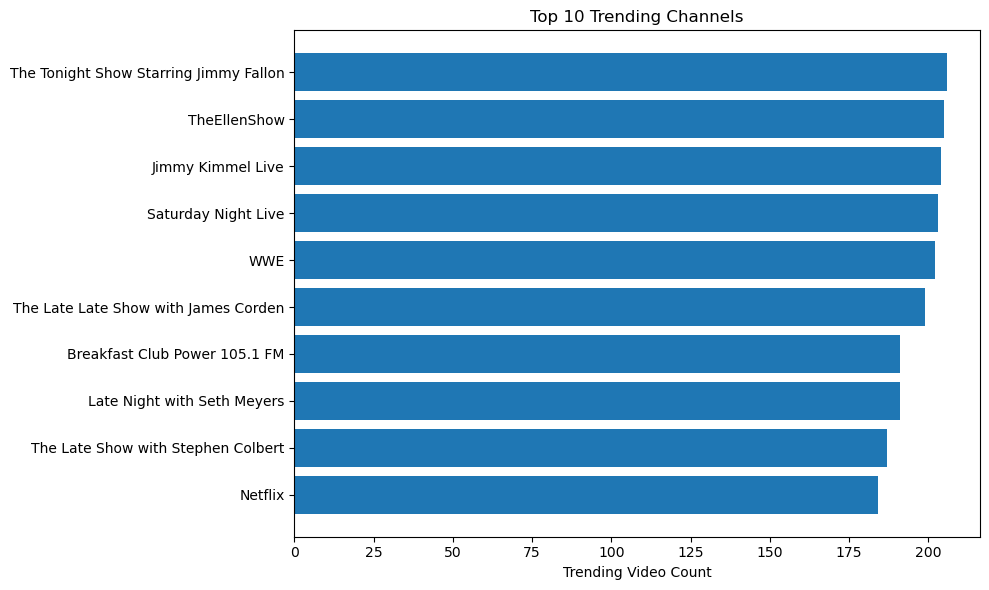

In [9]:
if df is not None:
    top_channels = df['channel_title'].value_counts().head(10)

    plt.figure(figsize=(10,6))
    plt.barh(top_channels.index, top_channels.values)
    plt.title("Top 10 Trending Channels")
    plt.xlabel("Trending Video Count")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


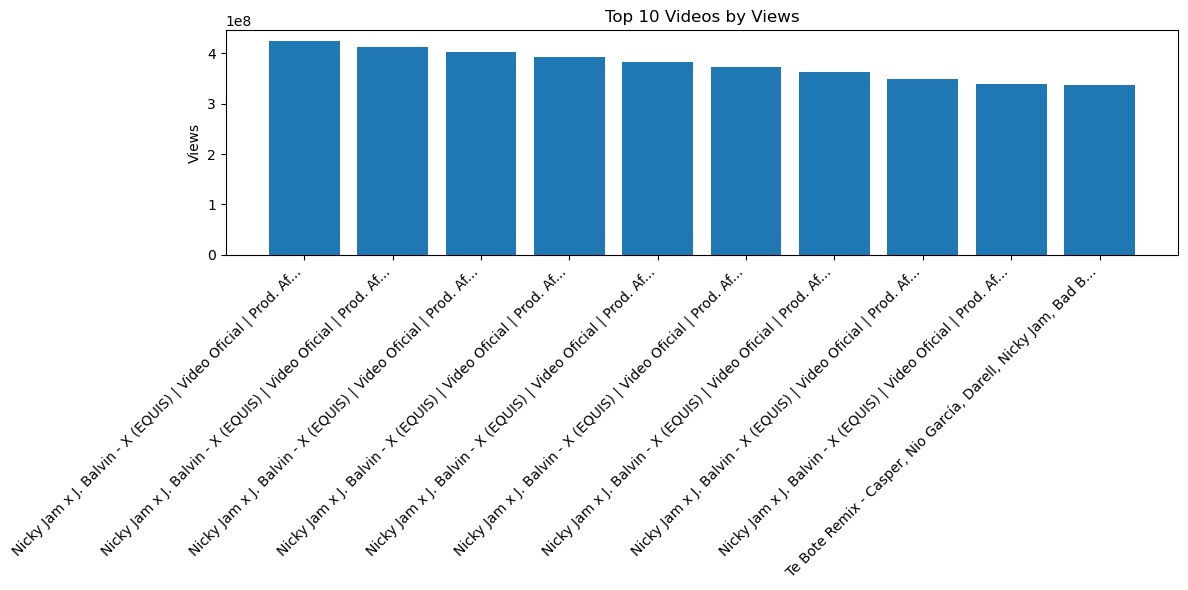

In [10]:
if df is not None:
    top_videos = df.sort_values('views', ascending=False).head(10)
    labels = top_videos['title'].astype(str).apply(lambda x: x[:60] + "..." if len(x) > 60 else x)

    plt.figure(figsize=(12,6))
    plt.bar(range(len(labels)), top_videos['views'])
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.title("Top 10 Videos by Views")
    plt.ylabel("Views")
    plt.tight_layout()
    plt.show()


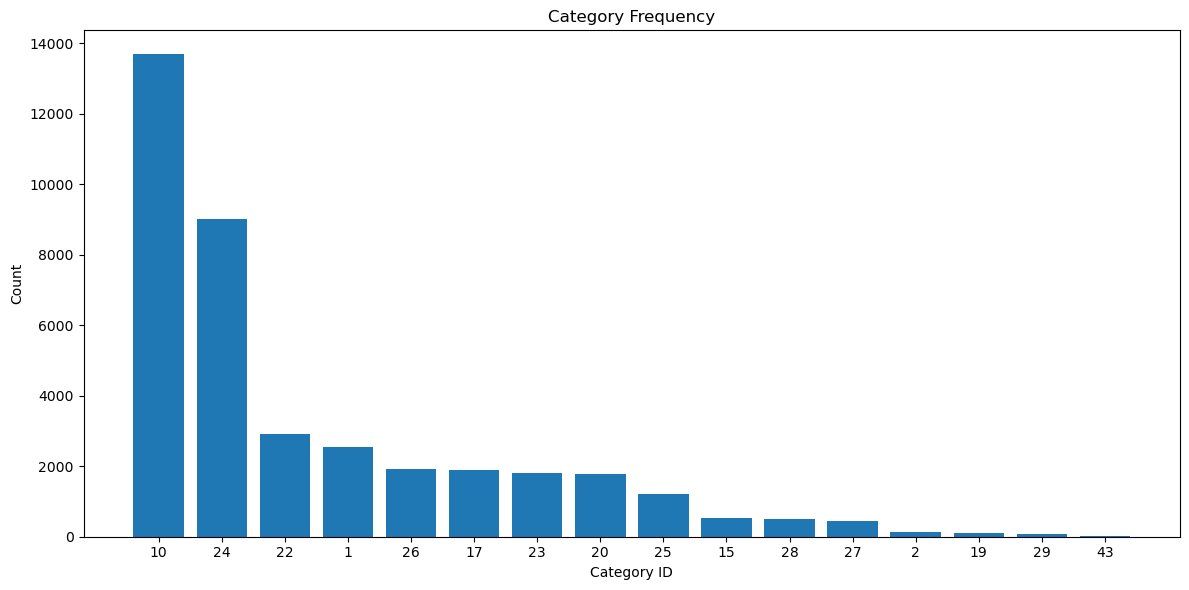

In [11]:
if df is not None:
    cat_counts = df['category_id'].value_counts()

    plt.figure(figsize=(12,6))
    plt.bar(cat_counts.index.astype(str), cat_counts.values)
    plt.title("Category Frequency")
    plt.xlabel("Category ID")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


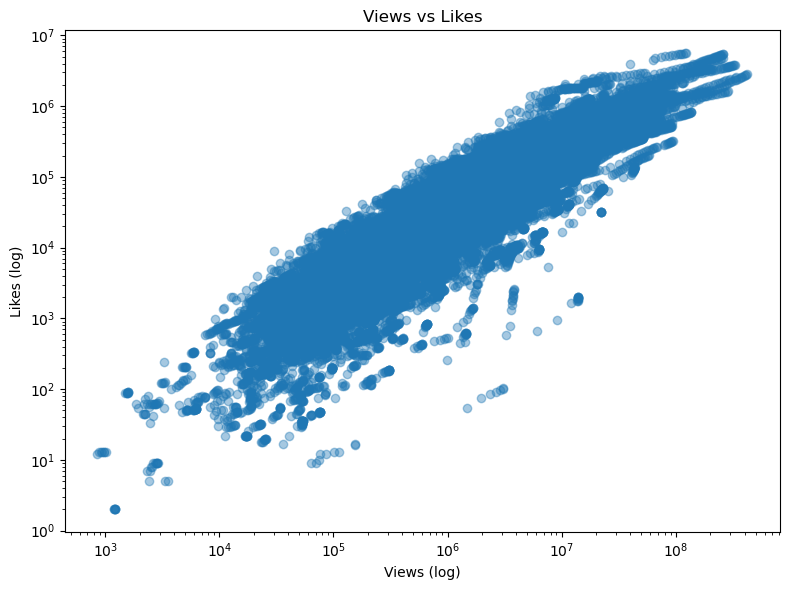

In [12]:
if df is not None:
    x = df['views'].replace(0, np.nan).dropna()
    y = df.loc[x.index, 'likes']

    plt.figure(figsize=(8,6))
    plt.scatter(x, y, alpha=0.4)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Views (log)")
    plt.ylabel("Likes (log)")
    plt.title("Views vs Likes")
    plt.tight_layout()
    plt.show()


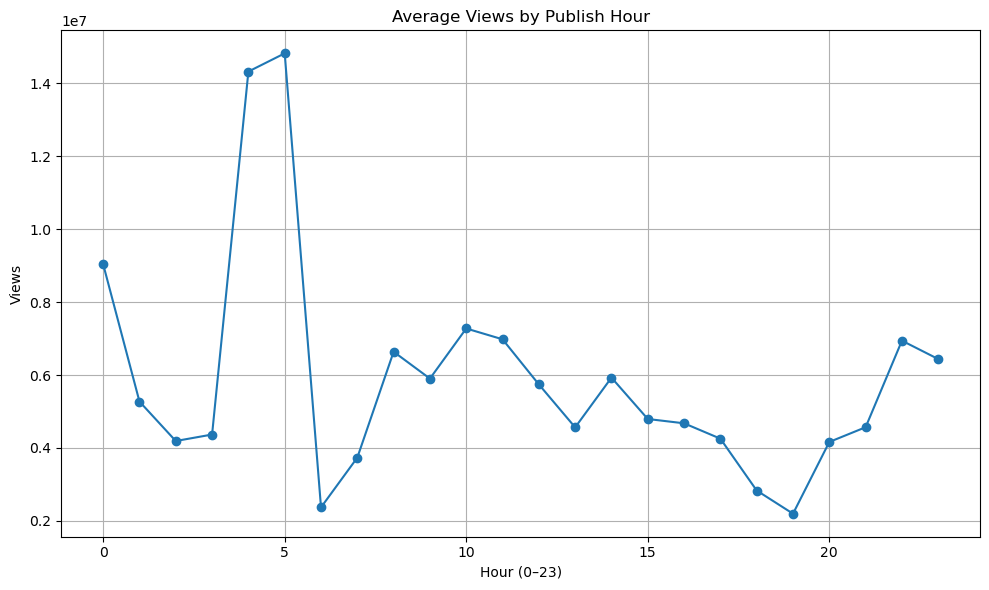

In [13]:
if df is not None:
    views_by_hour = df.groupby('publish_hour')['views'].mean().dropna()

    plt.figure(figsize=(10,6))
    plt.plot(views_by_hour.index, views_by_hour.values, marker='o')
    plt.title("Average Views by Publish Hour")
    plt.xlabel("Hour (0–23)")
    plt.ylabel("Views")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


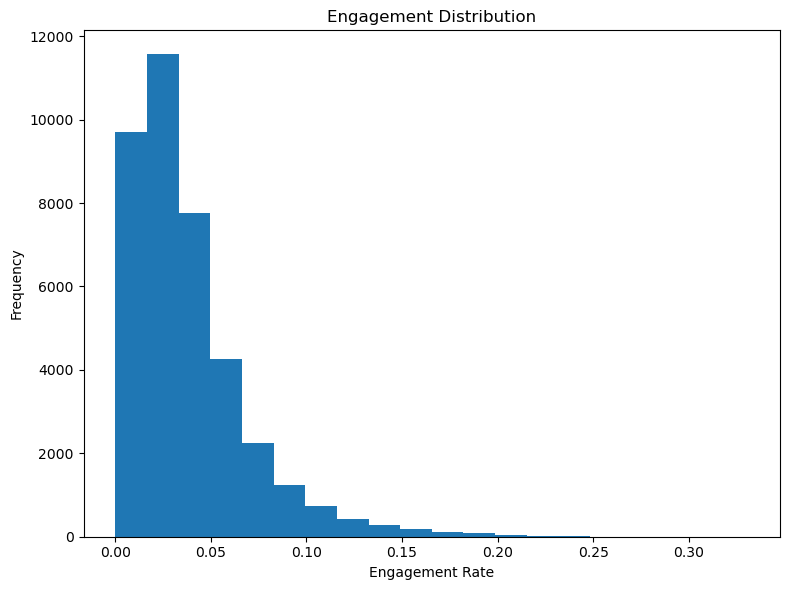

In [14]:
if df is not None:
    data = df['engagement'].dropna()

    plt.figure(figsize=(8,6))
    plt.hist(data, bins=20)
    plt.title("Engagement Distribution")
    plt.xlabel("Engagement Rate")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


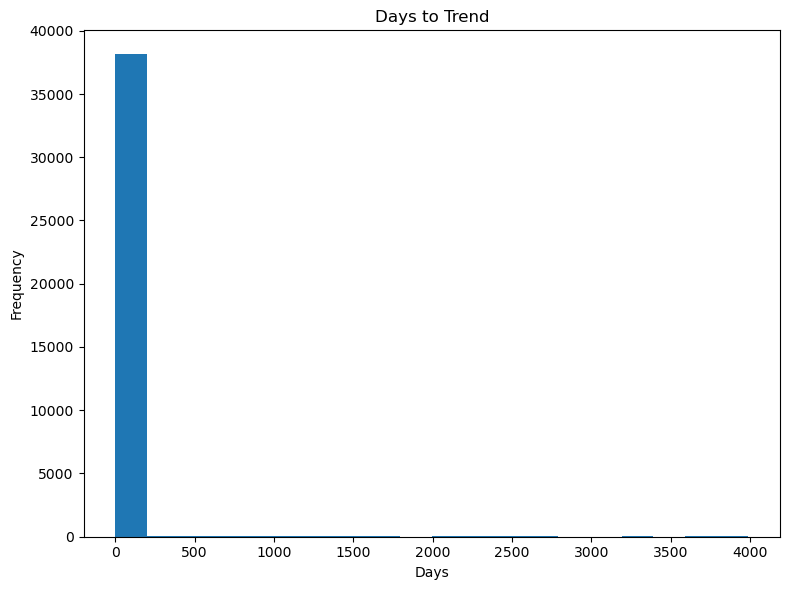

In [15]:
if df is not None:
    data = df['days_to_trend'].dropna()

    plt.figure(figsize=(8,6))
    plt.hist(data, bins=20)
    plt.title("Days to Trend")
    plt.xlabel("Days")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


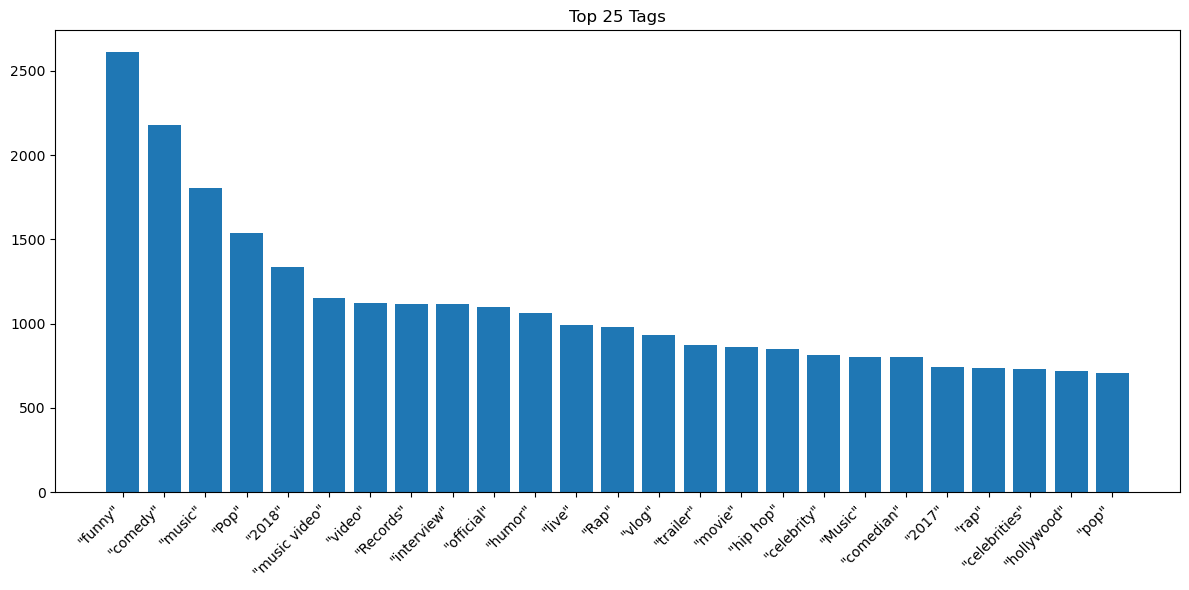

In [16]:
from collections import Counter

if df is not None:
    tags_col = df['tags'].dropna().astype(str)
    expanded = tags_col.apply(lambda x: x.split('|'))
    flat = [t.strip() for sub in expanded for t in sub if t.strip()]

    tag_counts = Counter(flat).most_common(25)

    if tag_counts:
        labels, counts = zip(*tag_counts)
        plt.figure(figsize=(12,6))
        plt.bar(range(len(counts)), counts)
        plt.xticks(range(len(counts)), labels, rotation=45, ha='right')
        plt.title("Top 25 Tags")
        plt.tight_layout()
        plt.show()


In [17]:
cols = ['views','likes','dislikes','comment_count','engagement','title_length','description_length']

if df is not None:
    available = [c for c in cols if c in df.columns]
    corr = df[available].corr()
    display(corr)


,views,likes,dislikes,comment_count,engagement,title_length,description_length
views,1.000000,0.795612,0.391043,0.465843,-0.130984,-0.027249,-0.034536
likes,0.795612,1.000000,0.445836,0.743554,0.073337,-0.104717,-0.043736
dislikes,0.391043,0.445836,1.000000,0.771996,-0.011353,-0.044513,-0.019266
comment_count,0.465843,0.743554,0.771996,1.000000,0.108690,-0.105754,-0.037695
engagement,-0.130984,0.073337,-0.011353,0.108690,1.000000,-0.198301,0.038662
title_length,-0.027249,-0.104717,-0.044513,-0.105754,-0.198301,1.000000,0.087644
description_length,-0.034536,-0.043736,-0.019266,-0.037695,0.038662,0.087644,1.000000


In [18]:
from collections import Counter

class YouTubeAnalyzer:
    def __init__(self, dataframe):
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Not a DataFrame")
        self.df = dataframe.copy()

    def top_channels(self, n=10):
        return self.df['channel_title'].value_counts().head(n)

    def top_videos_by_views(self, n=10):
        return self.df.sort_values('views', ascending=False).head(n)[['title','channel_title','views']]

    def most_engaging_videos(self, n=10):
        return self.df.sort_values('engagement', ascending=False).head(n)[['title','channel_title','engagement']]

    def channel_summary(self, channel):
        sub = self.df[self.df['channel_title'] == channel]
        if sub.empty:
            return f"Channel '{channel}' not found."

        return {
            "channel": channel,
            "num_trending": len(sub),
            "avg_views": sub['views'].mean(),
            "avg_engagement": sub['engagement'].mean(),
            "top_tags": Counter([t.strip()
                                 for s in sub['tags'].dropna().astype(str)
                                 for t in s.split('|')]).most_common(10)
        }

    def best_publish_hours(self, n=3):
        return self.df.groupby('publish_hour')['views'].mean().sort_values(ascending=False).head(n)

    def category_insights(self, cat_id):
        sub = self.df[self.df['category_id'] == cat_id]
        return {
            "category_id": cat_id,
            "num_videos": len(sub),
            "avg_views": sub['views'].mean(),
            "avg_engagement": sub['engagement'].mean()
        }


In [19]:
if df is not None:
    yt = YouTubeAnalyzer(df)

    print("Top Channels:")
    print(yt.top_channels(5))

    print("\nMost Engaging Videos:")
    display(yt.most_engaging_videos(5))

    print("\nBest Publish Hours:")
    print(yt.best_publish_hours(3))


Top Channels:
channel_title
The Tonight Show Starring Jimmy Fallon    206
TheEllenShow                              205
Jimmy Kimmel Live                         204
Saturday Night Live                       203
WWE                                       202
Name: count, dtype: int64

Most Engaging Videos:


,title,channel_title,engagement
14615,WHAT AM I?,KickThePj,0.331197
10198,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,0.315145
22179,j-hope 'Airplane' MV,ibighit,0.295706
14406,dodie - Secret For The Mad,dodieVEVO,0.276613
36395,Gorillaz - Humility (Official Video),Gorillaz,0.272923



Best Publish Hours:
publish_hour
5    1.482211e+07
4    1.432282e+07
0    9.039660e+06
Name: views, dtype: float64


In [20]:
if df is not None:
    yt.top_channels(20).to_csv("top_channels.csv")
    yt.top_videos_by_views(20).to_csv("top_videos.csv", index=False)
    print("Saved output CSVs.")


Saved output CSVs.


# Notebook Completed 
You may now use the toolkit for deeper insights 